In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from array import array
import time
import scipy.stats as st
import seaborn as sns
import pandas as pd
import math
import pickle

In [2]:
from TypicalMH import MH 
from TypicalMH import APMHT
from TypicalMH import Conf 
from TypicalMH import MiniMH

In [3]:
#proir function
def logpior(theta):
    #先验分布 均值为0 协方差矩阵为单位阵的多元正态分布取对数
    return np.log(st.multivariate_normal.pdf(theta,mean=np.zeros(d), cov=np.array([[1,0],[0,1]])))

    
def lik(i,z,theta):
    #似然函数为均值为theta，方差为2的正态分布
    #对z的第i行计算正态分布的密度函数，相当于计算每一个样本点d维的似然
    return 0.5*st.norm.pdf(z[i],theta[0],1)+0.5*st.norm.pdf(z[i],theta[0]+theta[1],1)

def loglik(i,z,theta):
    #对z的第i行计算正态分布的密度函数取对数
    return np.log(0.5*st.norm.pdf(z[i],theta[0],1)+0.5*st.norm.pdf(z[i],theta[0]+theta[1],1))

In [4]:
#parameters
n=10000
#start from l_mu
l_mu=[0.5,0]
T=10000
ep=0.05
m=100
d=2
l_mu=np.array(l_mu)


In [5]:
#data
z11=np.random.normal(0, 1, n//2)
z12=np.random.normal(0.4, 1, n//2)
z=np.hstack((z11,z12))
x=z.reshape((n,1))

In [6]:
tn=MH(z,T,l_mu,logpior,loglik)

0.24030518531799316


In [10]:
ep=0.05
m=1000
theta_ini=l_mu
nle=0
nle5=0

In [11]:
tnA,nleA=APMHT(z, T, ep, m, theta_ini,logpior,loglik)

0.15233802795410156
103000


In [12]:
tnC,nleC=Conf(z,T,m,theta_ini,logpior,loglik)

0.7040104866027832
866000.0


In [13]:
tnM,nleM=MiniMH(z,T,m,theta_ini,logpior,loglik)

0.4523947238922119
full_N_time: 16
num_Xc: 81


In [14]:
from PMMINMethod import clustering 
from PMMINMethod import generateB
from PMMINMethod import PMMIN 


In [18]:
def logpriorN(theta,p_mu=1,p_sigma=0.3):
    #先验分布 均值为0 协方差矩阵为单位阵的多元正态分布取对数
    return np.log(st.multivariate_normal.pdf(theta,mean=np.zeros(d), cov=np.array([[1,0],[0,1]])))
def loglikN(z,theta):
    #对z的第i行计算正态分布的密度函 数取对数
    return np.log(0.5*st.norm.pdf(z,theta[0],1)+0.5*st.norm.pdf(z,theta[0]+theta[1],1))

def gradient_llik(z,theta):
    #计算对数似然函数的梯度
    a=1/(0.5*st.norm.pdf(z,theta[0],1)+0.5*st.norm.pdf(z,theta[0]+theta[1],1))
    b=0.5*st.norm.pdf(z,theta[0],1)*(-z+theta[0])+0.5*st.norm.pdf(z,theta[0]+theta[1],1)*(-z+theta[0]+theta[1])
    
    return a*b

def hessian_llik(z,theta):
    
    #t1=st.norm.pdf(z,theta[0],1)/st.norm.pdf(z,theta[0]+theta[1],1)
    
    t=np.exp(1/(2)*(-2*theta[1]*z-theta[0]**2+(theta[0]+theta[1])**2))
    
    return (-1+(theta[1]**2) *((1+t)**(-2))*t) *np.eye(z.shape[0])

In [19]:
outk,outz,C=clustering(x,0.05)
data=x
B=generateB(data,outk,outz,C)

In [20]:
m=100
tnP=PMMIN(x,outz,outk,C,m,T, l_mu ,B, logpriorN,loglikN,gradient_llik,hessian_llik)

23.326321840286255


plot

C:\Users\gmx\AppData\Local\Temp/ipykernel_22408/3984388729.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=tn, label="MH", kde=True)
C:\Users\gmx\AppData\Local\Temp/ipykernel_22408/3984388729.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=tnA, label="AustMH", kde=True)
C:\Users\gmx\

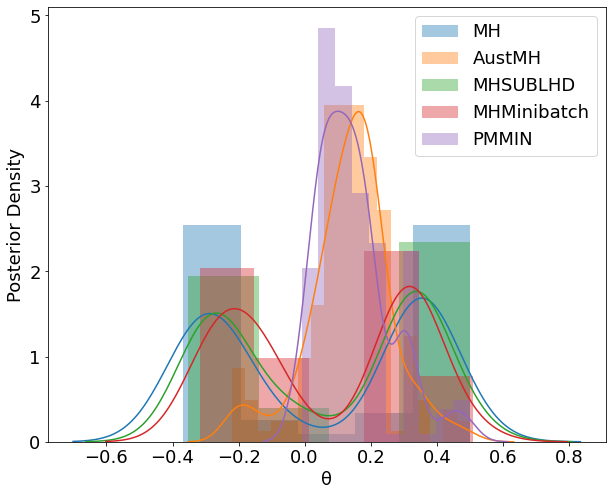

In [21]:
# Histograms for each gender

plt.figure(figsize=(10, 8))
sns.distplot(a=tn, label="MH", kde=True)
sns.distplot(a=tnA, label="AustMH", kde=True)
sns.distplot(a=tnC, label="MHSUBLHD", kde=True)
sns.distplot(a=tnM, label="MHMinibatch", kde=True)
sns.distplot(a=tnP, label="PMMIN", kde=True)

plt.xticks(size=18)
plt.ylabel('Posterior Density',fontsize=18)
plt.yticks(size=18)
plt.xlabel('θ',fontsize=18)
# Add title
#plt.title('Posterior Distribution',size=18)
# Force legend to appear
plt.legend(fontsize=18)
#sns.distplot(a=tn.transpose()[40001:50001,:], kde=False)
#sns.distplot(z, kde=False)
#sns.distplot(a=bayes, kde=False)